In [1]:
#! pip install numpy
#! pip install sklearn
#! pip install openpyxl
!pip install -U scikit-learn==1.2.2
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('clinical-study.xlsx')
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
1,SUBJ_001,46.000,Female,84.660,1.59000,DRUG,N
2,SUBJ_002,47.000,Female,71.210,1.64000,DRUG,Y
3,SUBJ_003,48.000,Female,69.850,1.73000,CONTROL,N
4,SUBJ_004,59.000,Female,62.940,1.50000,DRUG,Y
...,...,...,...,...,...,...,...
767,SUBJ_767,53.000,Male,88.670,1.72000,DRUG,Y
768,SUBJ_768,68.000,Female,80.290,1.63000,DRUG,Y
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N


In [3]:
df1=pd.read_excel('protein-levels.xlsx')
df1=df1.rename(columns={'participant_id':'subject_id'})
df1

,subject_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0
...,...,...
763,SUBJ_764,101.0
764,SUBJ_765,122.0
765,SUBJ_766,121.0
766,SUBJ_767,126.0


In [4]:
df=pd.merge(df,df1,on='subject_id')
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0


In [5]:
df=df.dropna()
df=df.drop_duplicates()
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0
...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0


In [6]:
df['BMI']=df['weight']/(df['height']**2)
df

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,BMI
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0,33.487599
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0,26.476056
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0,23.338568
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0,27.973333
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0,42.873273
...,...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,101.0,32.811202
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,122.0,36.434659
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,121.0,25.864215
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,126.0,29.972282


In [7]:
df.insert(6, 'protein_concentration', df.pop('protein_concentration'))

# Move 'BMI' column
df.insert(7, 'BMI', df.pop('BMI'))

# Print the updated DataFrame with the columns mov
df

,subject_id,age,sex,weight,height,trt_grp,protein_concentration,BMI,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,85.0,26.476056,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,183.0,23.338568,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,89.0,27.973333,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,137.0,42.873273,N
...,...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,101.0,32.811202,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,122.0,36.434659,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,121.0,25.864215,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,126.0,29.972282,Y


In [8]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df= df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Print the filtered DataFrame without outliers
df

,subject_id,age,sex,weight,height,trt_grp,protein_concentration,BMI,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,85.0,26.476056,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,183.0,23.338568,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,89.0,27.973333,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,137.0,42.873273,N
...,...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,101.0,32.811202,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,122.0,36.434659,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,121.0,25.864215,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,126.0,29.972282,Y


In [9]:
miraculon_b = df[df['trt_grp'] == 'DRUG']
standard_care = df[df['trt_grp'] == 'CONTROL']
#miraculon_b['sex']
miraculon_b

,subject_id,age,sex,weight,height,trt_grp,protein_concentration,BMI,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,85.0,26.476056,Y
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,89.0,27.973333,Y
8,SUBJ_008,57.0,Male,93.50,1.63,DRUG,115.0,35.191388,N
9,SUBJ_009,72.0,Male,85.57,1.68,DRUG,197.0,30.318169,N
...,...,...,...,...,...,...,...,...,...
763,SUBJ_763,70.0,Female,62.21,1.66,DRUG,89.0,22.575846,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,122.0,36.434659,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,121.0,25.864215,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,126.0,29.972282,Y


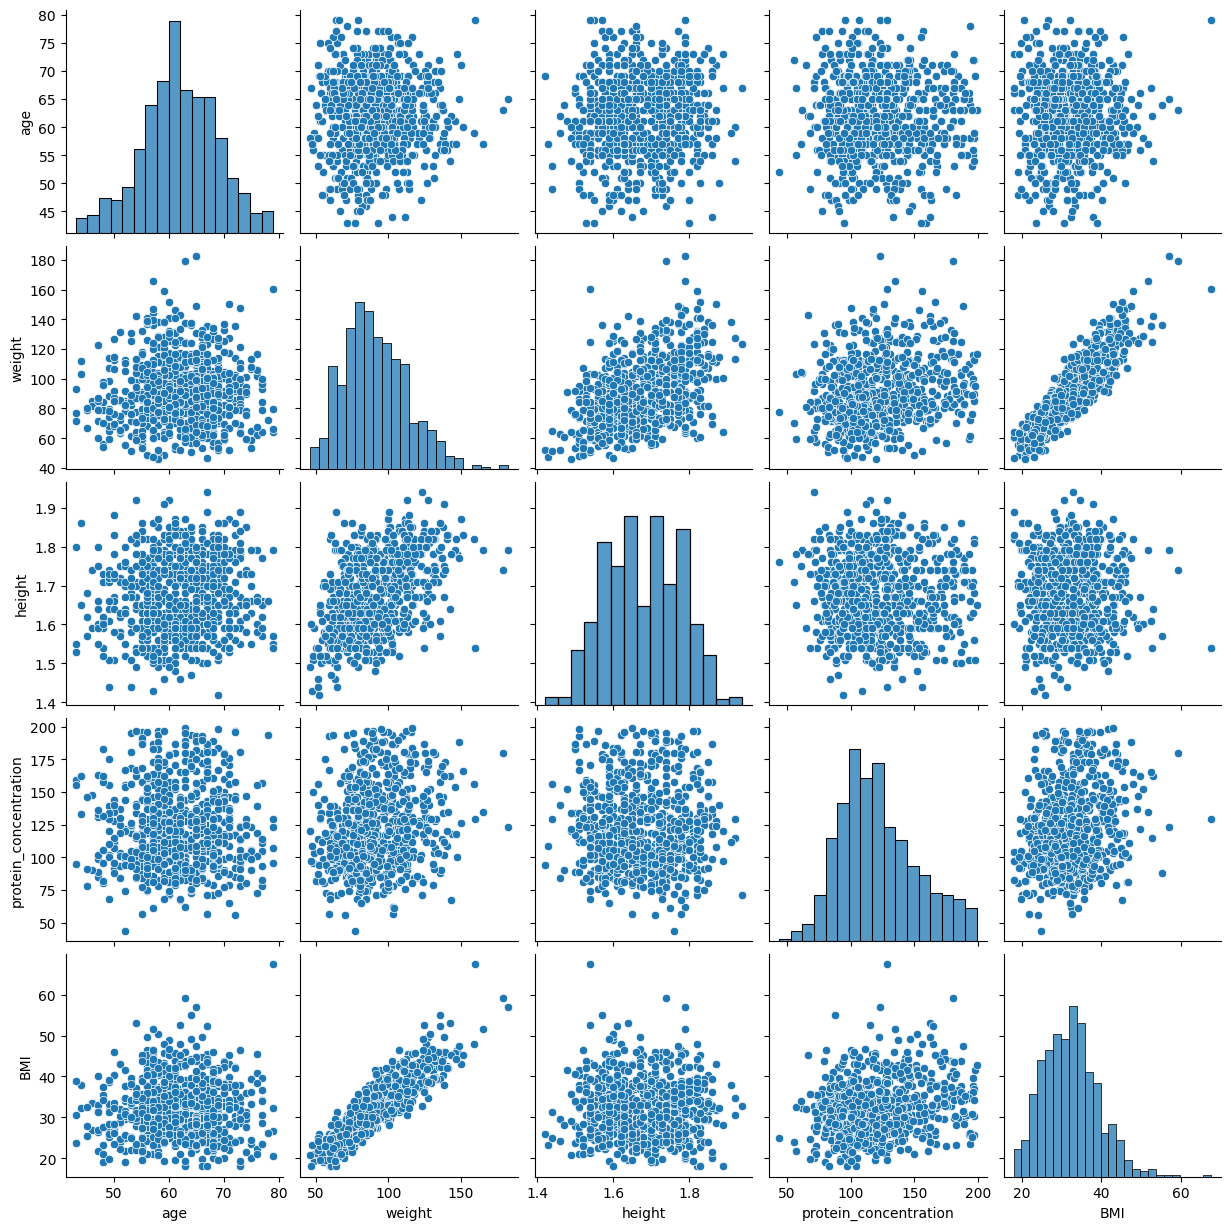

In [12]:
import seaborn as sns
sns.pairplot(df)

In [13]:
miraculon_b_response_rate = miraculon_b['RESPONSE'].value_counts(normalize=True) * 100
standard_care_response_rate = standard_care['RESPONSE'].value_counts(normalize=True) * 100

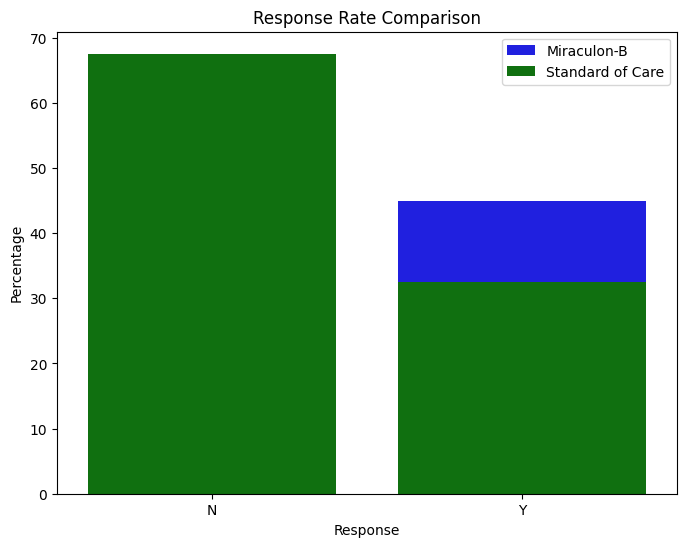

In [14]:
#! pip install matplotlib
#! pip install seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=miraculon_b_response_rate.index, y=miraculon_b_response_rate.values,color='blue', label='Miraculon-B')
sns.barplot(x=standard_care_response_rate.index, y=standard_care_response_rate.values,color='green', label='Standard of Care')
plt.title('Response Rate Comparison')
plt.xlabel('Response')
plt.ylabel('Percentage')
plt.legend()
plt.show()

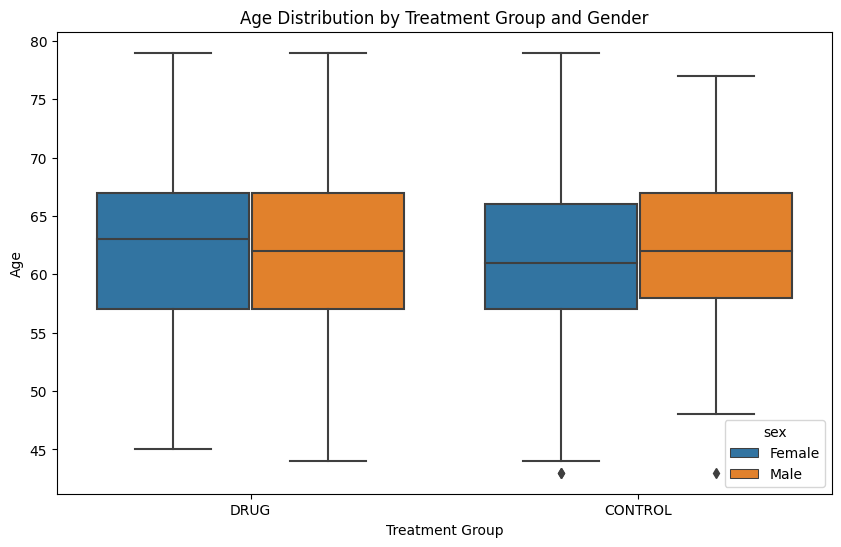

In [15]:
# Analyze the effectiveness by patient sub-groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='trt_grp', y='age', hue='sex', data=df)
plt.title('Age Distribution by Treatment Group and Gender')
plt.xlabel('Treatment Group')
plt.ylabel('Age')
plt.show()

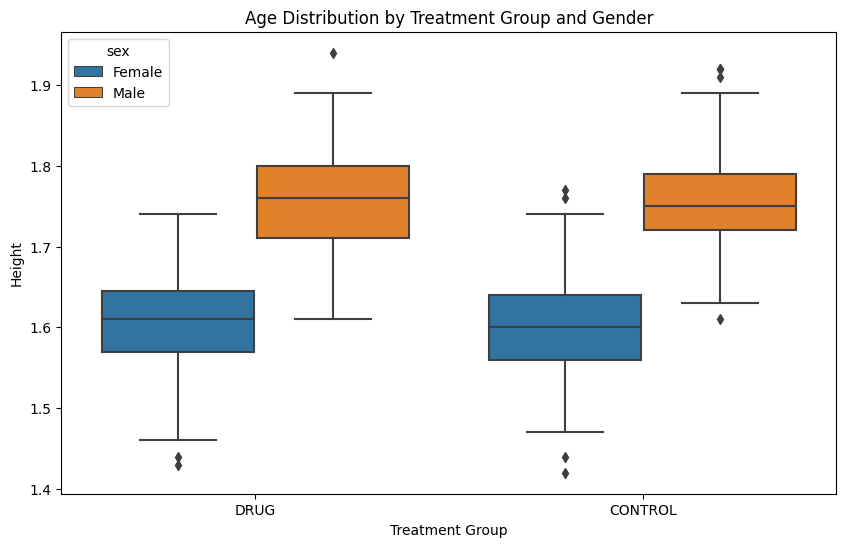

In [16]:
# Analyze the effectiveness by patient sub-groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='trt_grp', y='height', hue='sex', data=df)
plt.title('Age Distribution by Treatment Group and Gender')
plt.xlabel('Treatment Group')
plt.ylabel('Height')
plt.show()

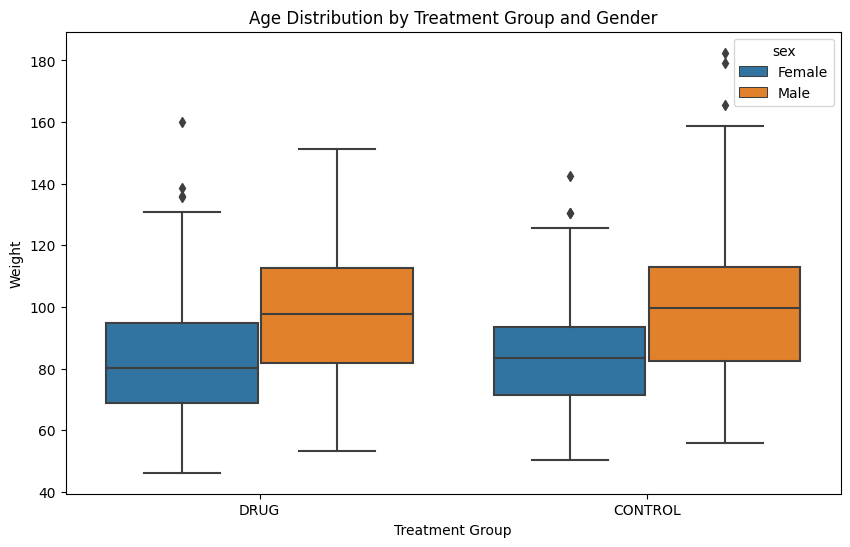

In [17]:
# Analyze the effectiveness by patient sub-groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='trt_grp', y='weight', hue='sex', data=df)
plt.title('Age Distribution by Treatment Group and Gender')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()

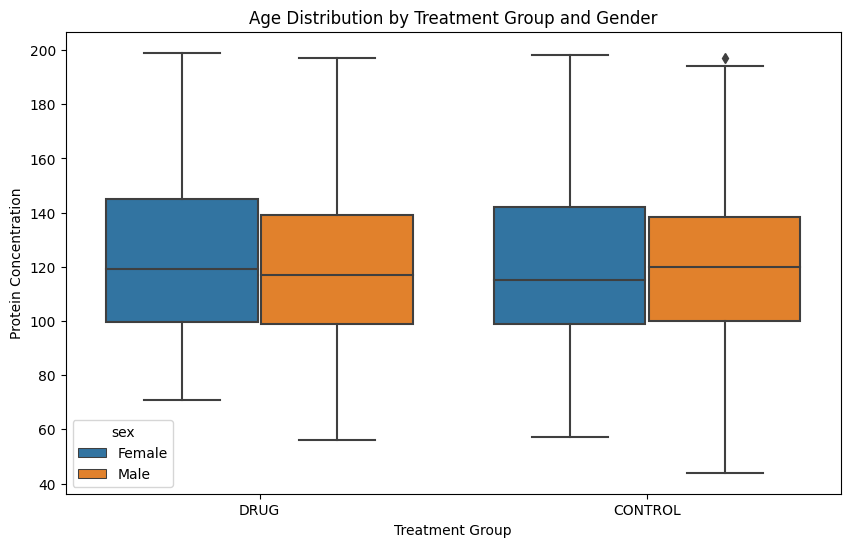

In [18]:
# Analyze the effectiveness by patient sub-groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='trt_grp', y='protein_concentration', hue='sex', data=df)
plt.title('Age Distribution by Treatment Group and Gender')
plt.xlabel('Treatment Group')
plt.ylabel('Protein Concentration')
plt.show()

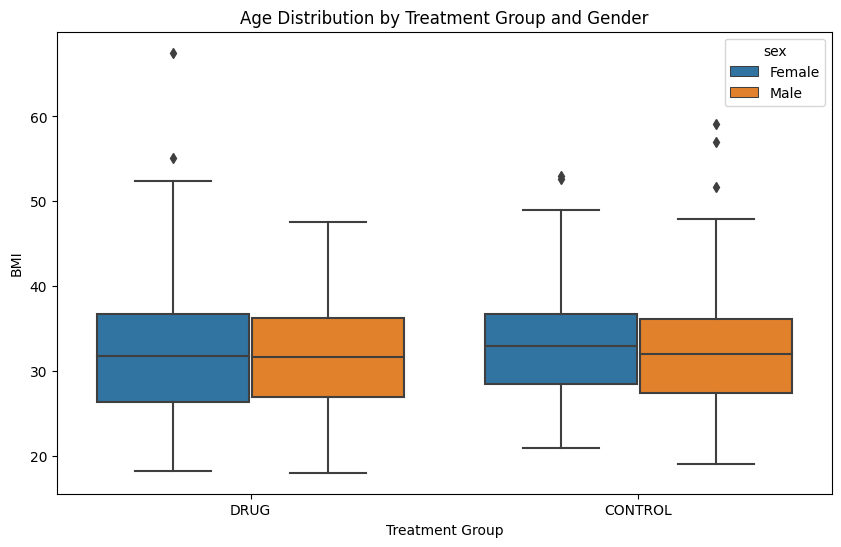

In [19]:
# Analyze the effectiveness by patient sub-groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='trt_grp', y='BMI', hue='sex', data=df)
plt.title('Age Distribution by Treatment Group and Gender')
plt.xlabel('Treatment Group')
plt.ylabel('BMI')
plt.show()

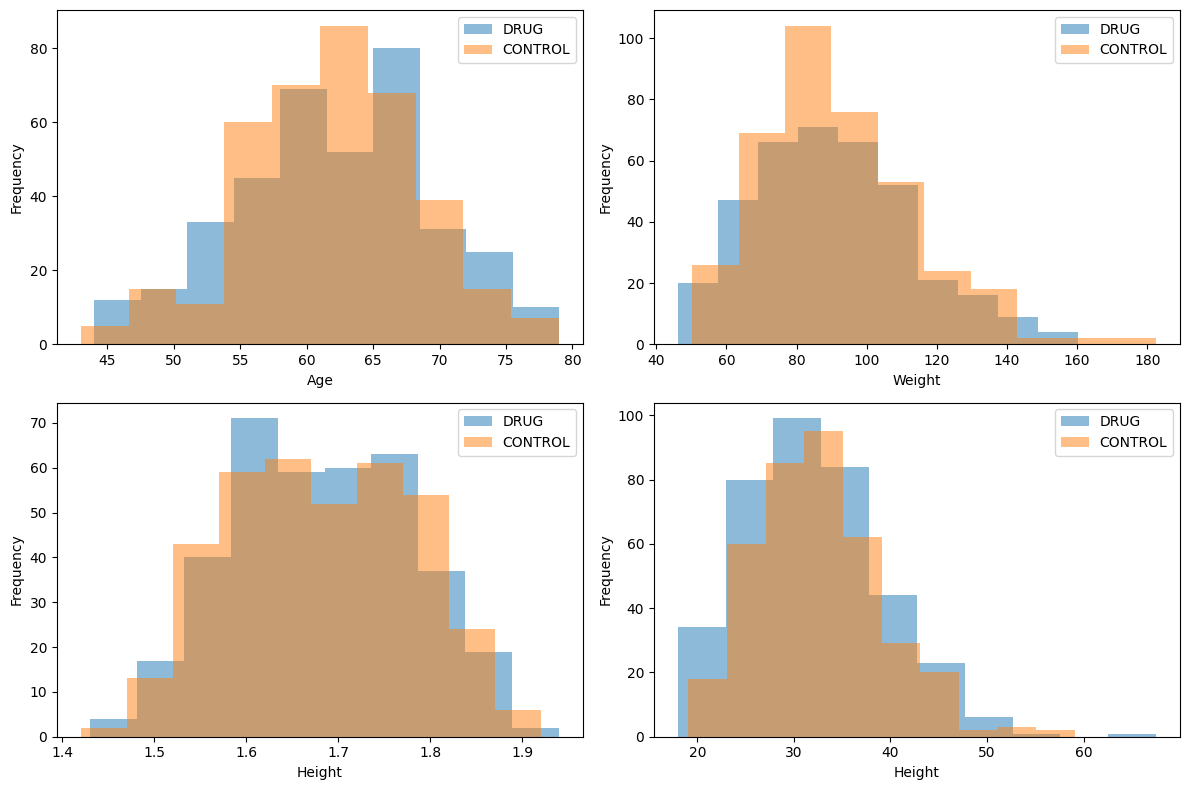

In [20]:
# Separate the data for DRUG and CONTROL groups
drug_data = df[df['trt_grp'] == 'DRUG']
control_data = df[df['trt_grp'] == 'CONTROL']

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Age distribution
axes[0, 0].hist(drug_data['age'], alpha=0.5, label='DRUG')
axes[0, 0].hist(control_data['age'], alpha=0.5, label='CONTROL')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Plot 2: Weight distribution
axes[0, 1].hist(drug_data['weight'], alpha=0.5, label='DRUG')
axes[0, 1].hist(control_data['weight'], alpha=0.5, label='CONTROL')
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Plot 3: Height distribution
axes[1, 0].hist(drug_data['height'], alpha=0.5, label='DRUG')
axes[1, 0].hist(control_data['height'], alpha=0.5, label='CONTROL')
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Plot 4: BMI
axes[1, 1].hist(drug_data['BMI'], alpha=0.5, label='DRUG')
axes[1, 1].hist(control_data['BMI'], alpha=0.5, label='CONTROL')
axes[1, 1].set_xlabel('Height')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# Plot 4: Response comparison
#drug_response = drug_data['RESPONSE'].value_counts()
#control_response = control_data['RESPONSE'].value_counts()
#axes[1, 1].bar(drug_response.index, drug_response.values, alpha=0.5, label='DRUG')
#axes[1, 1].bar(control_response.index, control_response.values, alpha=0.5, label='CONTROL')
#axes[1, 1].set_xlabel('Response')
#axes[1, 1].set_ylabel('Count')
#axes[1, 1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show all the plots in a single window
plt.show()

In [21]:
df

,subject_id,age,sex,weight,height,trt_grp,protein_concentration,BMI,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,148.0,33.487599,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,85.0,26.476056,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,183.0,23.338568,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,89.0,27.973333,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,137.0,42.873273,N
...,...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,101.0,32.811202,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,122.0,36.434659,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,121.0,25.864215,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,126.0,29.972282,Y


In [22]:
# Separate the features (X) and target variable (y)
X = df[['age', 'sex','trt_grp','protein_concentration','BMI']]
y = df['RESPONSE']

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.compose import ColumnTransformer
categorical_features = ['sex', 'trt_grp']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [27]:
# Fit the model
model.fit(X_train, y_train)

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'trt_grp'])])),
                ('classifier', LogisticRegression())])

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

Accuracy: 76.0 %


In [30]:
import pickle

In [31]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))